# som with scikit-learn manner
sksom is scikit-learn api for SimpleSOM. This class has method below  
* fit
* predict
* predict_proba

and attributes labels\_ too.

In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.
/home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#/home/admin/github/wordroid.sblo.jp/lib
import os, sys
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from som import som

In [3]:
import random

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = datasets.load_iris()
print(dir(iris))
X = iris.data
print(iris.target_names)
X_sc = preprocessing.scale(X)

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']


In [5]:
X_sc[:3]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673]])

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### prepare initial landmarks
You can obtain initial landmarks using SimpleSOM.

In [7]:
sobj_makeK = som.SimpleSOM((20, 30), initialization_func='linear')
#sobj_makeK = som.SimpleSOM((20, 30))
sobj_makeK

In [8]:
sobj_makeK._initialize(X_sc)
sobj_makeK.K.shape

(600, 4)

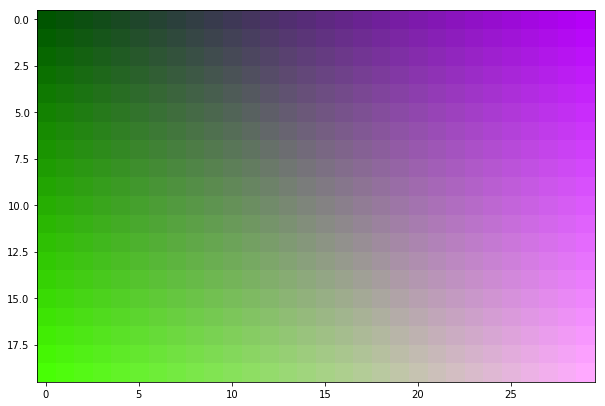

In [9]:
img = som.conv2img(sobj_makeK.K, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

### sksom

In [10]:
'''
argument init_K must be needed
'''
sobj = som.sksom((20, 30), init_K=sobj_makeK.K, it=50, verbose=2, early_stopping=False)
#sobj = som.sksom((20, 30), init_K=sobj_makeK.K, r=1.5, it=1500, verbose=2)
sobj

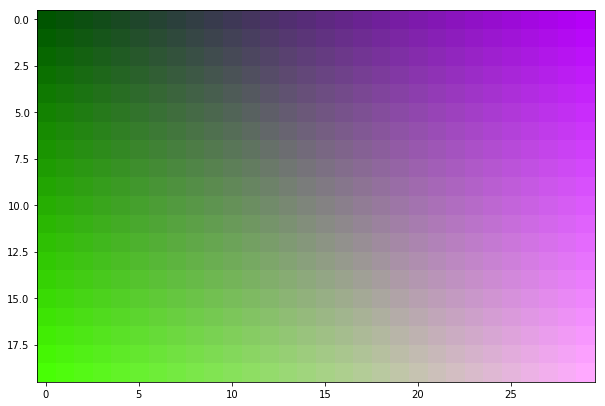

In [11]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

## fit
r decreases linearly to one during training, if r=None

In [12]:
sobj.fit(X_sc)

r: 1.000000 / gamma: 0.500000 / mean distance: 0.246359: 100%|██████████| 50/50 [00:00<00:00, 152.43it/s] 
r: 1.0 gamma: 0.5 mean distance: 0.24635867089366367


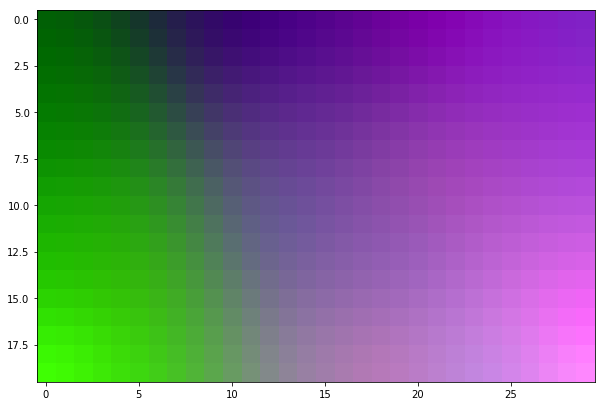

In [13]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

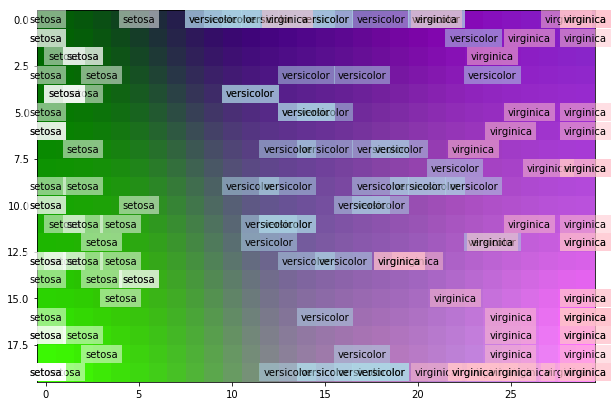

In [14]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

for i, m in enumerate(sobj.predict(X_sc)):
    b, a = divmod(m, sobj.kshape[1])
    if iris.target_names[iris.target[i]] == 'versicolor':
        plt.text(a, b, 'versicolor', ha='center', va='center',
               bbox=dict(facecolor='lightblue', alpha=0.5, lw=0))
    elif iris.target_names[iris.target[i]] == 'virginica':
        plt.text(a, b, 'virginica', ha='center', va='center',
               bbox=dict(facecolor='pink', alpha=0.5, lw=0))
    else:
        plt.text(a, b, 'setosa', ha='center', va='center',
               bbox=dict(facecolor='white', alpha=0.5, lw=0))

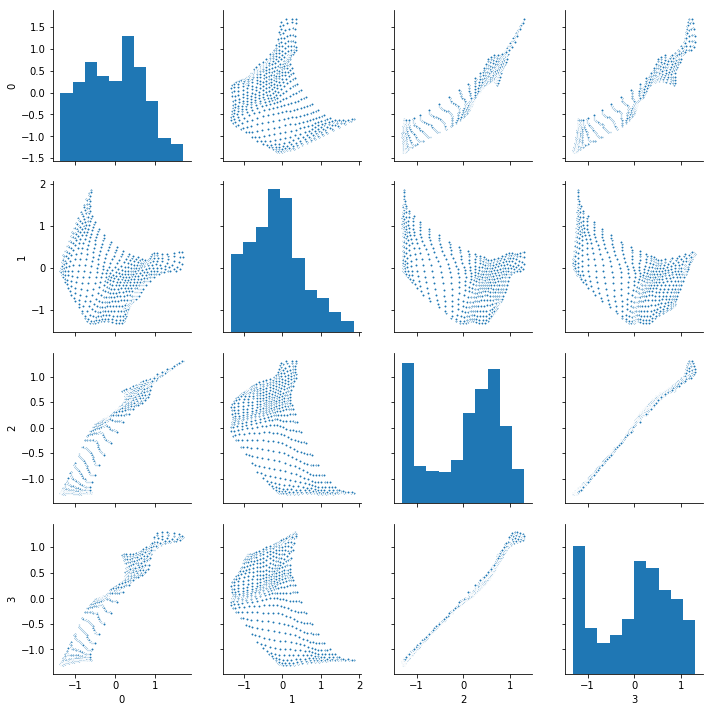

In [15]:
df = pd.DataFrame(sobj.landmarks_)
sns.pairplot(df, markers='.')

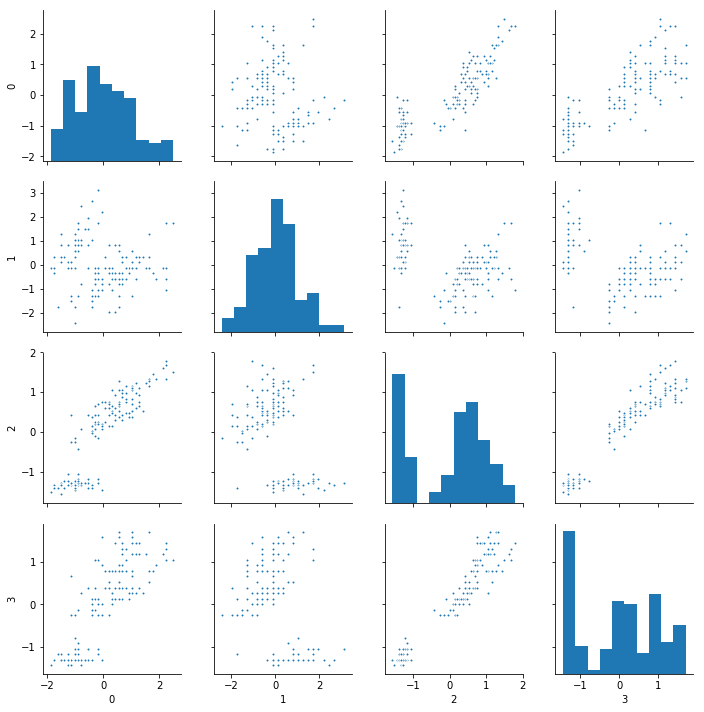

In [16]:
df = pd.DataFrame(X_sc)
sns.pairplot(df, markers='.')

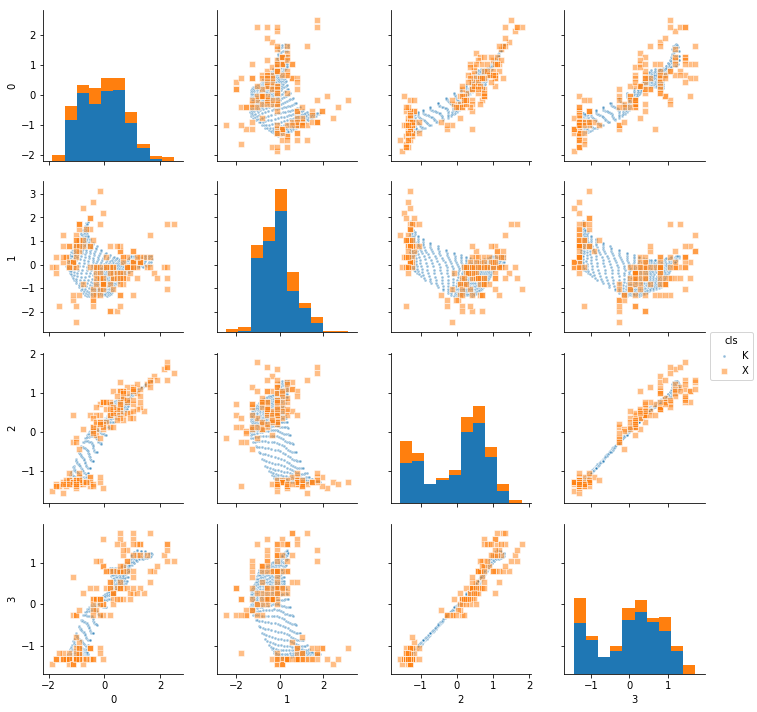

In [17]:
df1= pd.DataFrame(sobj.landmarks_)
df1['cls'] = 'K'
df1.head()
df2 = pd.DataFrame(X_sc)
df2['cls'] = 'X'
df2.head()
df = pd.concat([df1, df2], axis=0)
df.head()
df.shape
sns.pairplot(df, markers=['.', 's'], hue='cls', plot_kws={'alpha': 0.5})

### further train

In [18]:
'''
r: 1.5 -> 1.2
'''
sobj.it = 500
sobj.r = (1.5, 1.2)
sobj.verbose = 2
sobj.fit(X_sc)

r: 1.200000 / gamma: 0.347222 / mean distance: 0.036687: 100%|██████████| 500/500 [00:03<00:00, 148.78it/s]
r: 1.2 gamma: 0.3472222222222222 mean distance: 0.03668744671313322


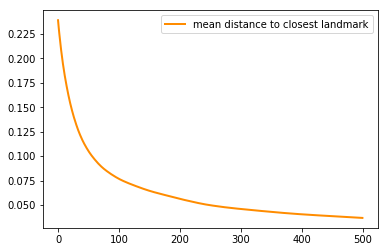

In [19]:
lw = 2
plt.plot(np.arange(len(sobj.meanDist)), sobj.meanDist, label="mean distance to closest landmark",
         color="darkorange", lw=lw)
plt.legend(loc="best")

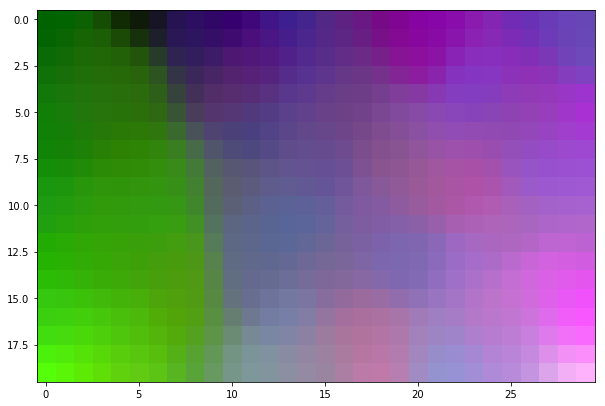

In [20]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

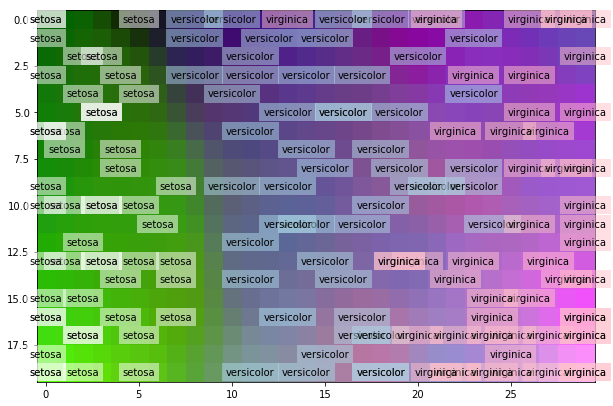

In [21]:
img = som.conv2img(sobj.landmarks_, (20, 30))
plt.figure(figsize=(10, 10))
plt.imshow(img)

for i, m in enumerate(sobj.predict(X_sc)):
    b, a = divmod(m, sobj.kshape[1])
    if iris.target_names[iris.target[i]] == 'versicolor':
        plt.text(a, b, 'versicolor', ha='center', va='center',
               bbox=dict(facecolor='lightblue', alpha=0.5, lw=0))
    elif iris.target_names[iris.target[i]] == 'virginica':
        plt.text(a, b, 'virginica', ha='center', va='center',
               bbox=dict(facecolor='pink', alpha=0.5, lw=0))
    else:
        plt.text(a, b, 'setosa', ha='center', va='center',
               bbox=dict(facecolor='white', alpha=0.5, lw=0))

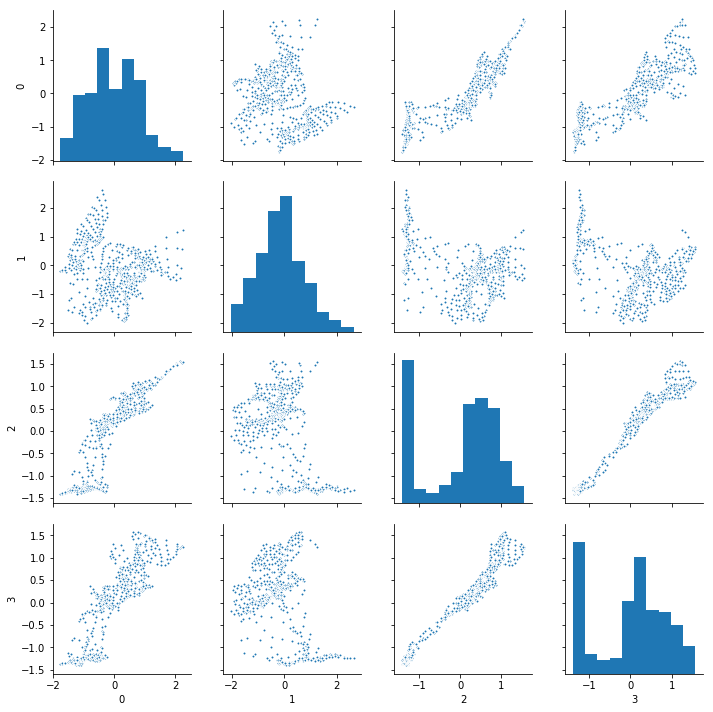

In [22]:
df = pd.DataFrame(sobj.landmarks_)
sns.pairplot(df, markers='.')

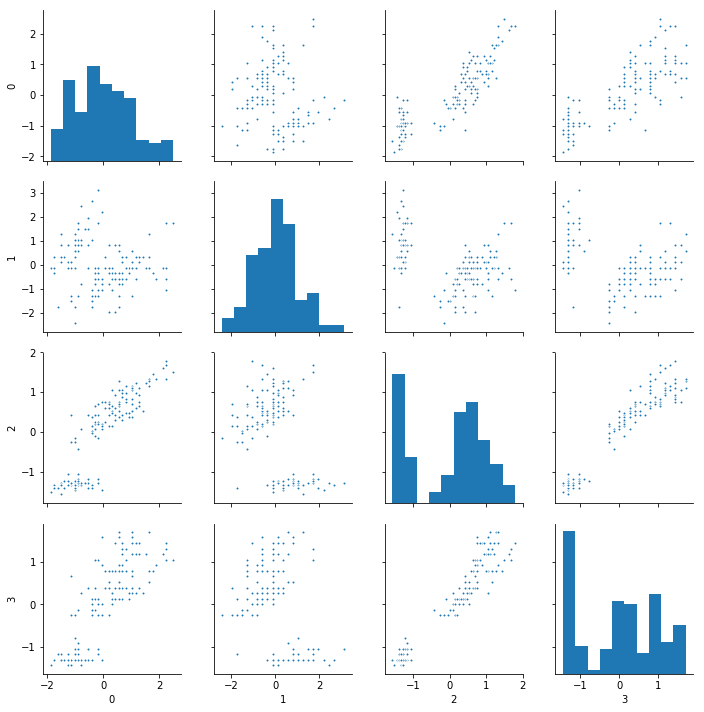

In [23]:
df = pd.DataFrame(X_sc)
sns.pairplot(df, markers='.')

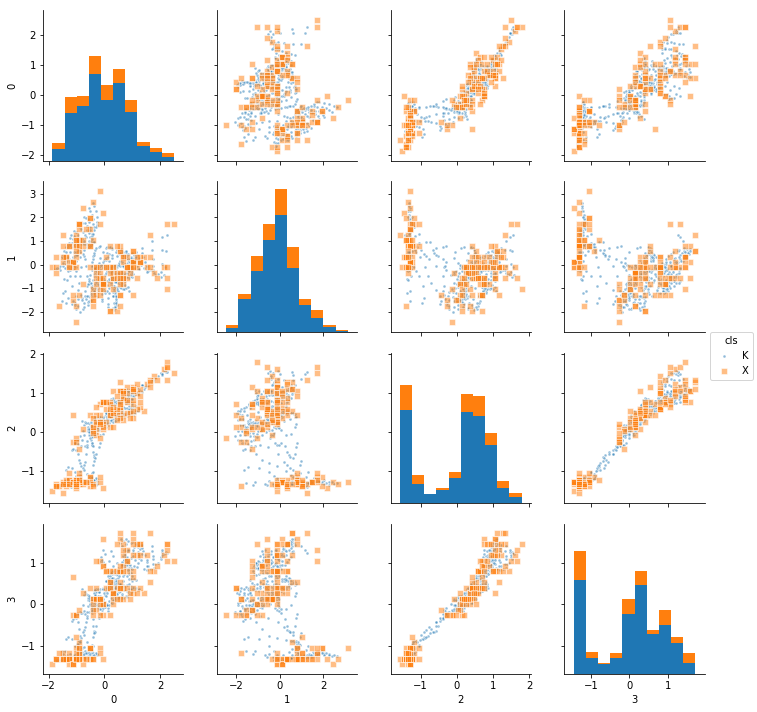

In [24]:
df1= pd.DataFrame(sobj.landmarks_)
df1['cls'] = 'K'
df1.head()
df2 = pd.DataFrame(X_sc)
df2['cls'] = 'X'
df2.head()
df = pd.concat([df1, df2], axis=0)
df.head()
df.shape
sns.pairplot(df, markers=['.', 's'], hue='cls', plot_kws={'alpha': 0.5})

## labels_

In [25]:
sobj.labels_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## predict
predict returns the nearest labels of input

In [26]:
sobj.predict(sobj.landmarks_[:30])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

In [27]:
sobj.predict(X_sc)

array([393,  94, 211,  90, 391, 512, 270, 303,   0, 153, 515, 301,  62,
         0, 572, 570, 512, 393, 575, 450, 427, 452, 390, 277, 300, 125,
       305, 424, 395, 181, 122, 397, 540, 570, 153, 214, 487, 153,  30,
       303, 362,   5, 180, 336, 480,  63, 480, 180, 484, 244, 588, 555,
       588,  42, 263, 255, 584,  38, 291, 191,  10, 405,  18, 318, 280,
       527, 344, 166,  21,  16, 493, 228,  53, 169, 290, 497, 293, 354,
       347, 130,  71, 101, 166, 143, 343, 581, 528,  80, 371,  45, 104,
       436, 107,   8, 163, 431, 283, 259,  98, 224, 592,  28, 476, 266,
       329, 539,  13, 448, 179, 597, 530, 207, 389,  26,  89, 532, 413,
       599, 509,  21, 535,  29, 509, 176, 595, 537, 205, 410, 268, 417,
       449, 599, 269, 202, 113, 539, 592, 442, 409, 474, 534, 504,  28,
       565, 594, 359, 116, 356, 591, 409], dtype=int32)

## predict_proba
predict_proba returns probability array of shape = [n_query, n_landmarks]

In [28]:
'''
evaluate by gaussian kernel with gamma
'''
print(sobj.som.gamma)
sobj.predict_proba(X_sc)[:10,:5]

0.3472222222222222


array([[0.45093259, 0.46547644, 0.48713291, 0.35994236, 0.15531378],
       [0.86690558, 0.88471722, 0.93094867, 0.8971162 , 0.6365937 ],
       [0.85674135, 0.86845607, 0.88012229, 0.73752317, 0.43476081],
       [0.9374392 , 0.94636803, 0.95471177, 0.83931101, 0.54802451],
       [0.38865379, 0.39989049, 0.4108819 , 0.28323941, 0.11139015],
       [0.11020801, 0.11554061, 0.12324804, 0.07606215, 0.02217243],
       [0.67888379, 0.68662357, 0.68089542, 0.50625934, 0.24826553],
       [0.57561783, 0.59158943, 0.61575622, 0.47689153, 0.22794387],
       [0.98893786, 0.98884889, 0.98420177, 0.94799794, 0.75968544],
       [0.8357362 , 0.85372314, 0.89211477, 0.80674964, 0.5159384 ]])

In [29]:
sobj.predict_proba(sobj.landmarks_[:15])[:,:5]

array([[1.        , 0.99921379, 0.98628817, 0.90871321, 0.6815818 ],
       [0.99921379, 1.        , 0.99178157, 0.91701096, 0.68526367],
       [0.98628817, 0.99178157, 1.        , 0.94782986, 0.7160675 ],
       [0.90871321, 0.91701096, 0.94782986, 1.        , 0.87739153],
       [0.6815818 , 0.68526367, 0.7160675 , 0.87739153, 1.        ],
       [0.51360963, 0.51536968, 0.54229671, 0.72412903, 0.95716887],
       [0.3958732 , 0.39958255, 0.431381  , 0.60951957, 0.84453022],
       [0.22508666, 0.22952648, 0.25748486, 0.38557361, 0.54499996],
       [0.15806833, 0.16178331, 0.18443561, 0.28675535, 0.41946043],
       [0.11838124, 0.12136567, 0.13994971, 0.22847696, 0.35775143],
       [0.08413196, 0.08658928, 0.10158735, 0.17363917, 0.28557127],
       [0.06893881, 0.07133428, 0.08488281, 0.14350397, 0.22334369],
       [0.05978372, 0.06197791, 0.07375697, 0.11889983, 0.16813433],
       [0.05586494, 0.05788048, 0.06843966, 0.10584237, 0.13981162],
       [0.06301244, 0.06553577, 0.